# Odziv linearnih sistemov na naključno vzbujanje

Vrnimo se k linearnemu sistemu z eno prostostno stopnjo (glejte lastnosti: {ref}`sec:LTI_lastnosti`):

$$
	\underbrace{f(t)}_{\textrm{Vzbujanje}}\to {\textrm{Sistem}}\to \underbrace{x(t)}_{\textrm{Odziv}}.
$$

Odziv na deterministično vzbujanje izračunamo s pomočjo konvolucije:

$$
	x(t) = \int_{-\infty}^{t}\,f(\tau)\,h(t-\tau)\,\textrm{d}  \tau =
	\int_{0}^{+\infty}\,h(\tau)\,f(t-\tau)\,\textrm{d}  \tau,
$$

kjer je $h(t)$ impulzna prenosna funkcija, ki definira linearni sistem.

## Srednja vrednost odziva

V nadaljevanju bomo predpostavili, da je vzbujanje $f(t)$ naključno in izračunajmo najprej pričakovano srednjo vrednost odziva. Uporabiti moramo operator pričakovanja $E[]$:

$$
	\mu_x = E[x(t)] = E\Big[
	\int_{0}^{+\infty}\,h(\tau)\,f(t-\tau)\,\textrm{d}  \tau \Big],
$$

ker je naključna vrednost samo pri vzbujanju $f(t)$, sledi

$$
	\mu_x = 
	\int_{0}^{+\infty}\,h(\tau)\,E\big[f(t-\tau)\big]\,\textrm{d}  \tau
    = 
	\int_{0}^{+\infty}\,h(\tau)\,\mu_f\,\textrm{d}  \tau ,
    = 
	\mu_f\,\int_{0}^{+\infty}\,h(\tau)\,\textrm{d}  \tau ,
$$
Od tukaj pa sledi sklep:

:::{note}

Če opazujemo proces, ki ima na vhodu/vzbujanju srednjo vrednost enako nič, bo tudi srednja vrednost odziva enaka nič (ne glede na impulzno prenosno funkcijo):

$$
\mu_x = \mu_f\,\int_{0}^{+\infty}\,h(\tau)\,\textrm{d}  \tau ,
$$

:::

## Avtokorelacija

Tukaj želimo odgovoriti na vprašanje kako je avtokorelacija vzbujanja $R_{ff}(\tau)$ povezana z avtokorelacijo odziva $R_{xx}(\tau)$, poglejmo detajle:

$$
\begin{split}
R_{xx}(\tau)&=E\big[x(t)\,x(t+\tau)\big]\\
&=E\Big[\int_{0}^{+\infty}\int_{0}^{+\infty}\,h(\tau_1)\,f(t-\tau_1)\,\,h(\tau_2)\,f(t+\tau-\tau_2)\,\textrm{d}  \tau_1\,\textrm{d}  \tau_2\Big]
\end{split}
$$

Nadaljujemo z izpeljavo ($h(t)$ nima pričakovanja, velja $h(t)=E[h(t)]$):

$$
R_{xx}(\tau)
=\int_{0}^{+\infty}\int_{0}^{+\infty}\,h(\tau_1)\,h(\tau_2)\,E\Big[f(t-\tau_1)\,f(t+\tau-\tau_2)\big]\,\textrm{d}  \tau_1\,\textrm{d}  \tau_2
$$

Uporabimo zamenjavo $t_1=t-\tau_1$ iz česar sledi $E\Big[f(t-\tau_1)\,f(t+\tau-\tau_2)\big]=E\Big[f(t_1)\,f(t_1+\tau_1+\tau-\tau_2)\big]=R_{ff}(\tau+\tau_1-\tau_2)$ in nato:

$$
R_{xx}(\tau)
=\int_{0}^{+\infty}\int_{0}^{+\infty}\,h(\tau_1)\,h(\tau_2)\,R_{ff}(\tau+\tau_1-\tau_2)\,\textrm{d}  \tau_1\,\textrm{d}  \tau_2
$$

Naredimo sedaj prehod v frekvenčno domeno:

$$
\begin{split}
S_{xx} &= \int_{-\infty}^{+\infty}R_{xx}(\tau)\,e^{-\textrm{i}\,2\pi\,f\,\tau}\,\textrm{d}\tau\\
&=
\underbrace{\int_{0}^{+\infty}\,h(\tau_1)\,e^{+\textrm{i}\,2\pi\,f\,\tau_1}\,\textrm{d}  \tau_1}_{H^*(f)}\,
\underbrace{\int_{0}^{+\infty}\,h(\tau_2)\,e^{-\textrm{i}\,2\pi\,f\,\tau_2}\,\textrm{d}  \tau_2}_{H(f)}\,
\underbrace{\int_{-\infty}^{+\infty}R_{ff}(u)\,e^{-\textrm{i}\,2\pi\,f\,u}\,\textrm{d}  u}_{S_{ff}(f)}.
\end{split}
$$

Opomba: v zgornjem izrazu smo uporabili zamenjavo: $u=\tau+\tau_1-\tau_2$ in posledično $e^{-\textrm{i}\,2\pi\,f\,\tau}=e^{-\textrm{i}\,2\pi\,f\,(u-\tau_1+\tau_2)}$ ter nato ločili integracijske spremenljivke.

Končni rezultat je:

:::{note}

Avtospektralna gostota moči na odzivni strani je definirana kot:

$$
S_{xx} = H^*(f)\,H(f)\,S_{ff}(f),
$$

kjer ${}^*$ označuje kompleksno konjugirano vrednost.

:::

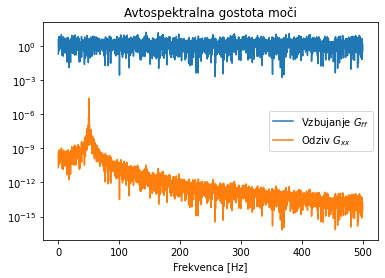

In [17]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
N = 5000
dt = 1./1000
f = rng.normal(size=N)
time = np.arange(N)*dt

F = np.fft.rfft(f)
freq = np.fft.rfftfreq(N, d=dt)
Gff = 2*np.abs(F.conj()*F)/N

def alpha(freq, m, k, c):
    """
    Frekvenčna prenosna funkcija linearnega oscilatorja.
    """
    omega = 2*np.pi*freq
    return 1 / (-omega**2*m + 1j*omega*c + k)

H = alpha(freq, m=1,k=1e5,c=1e-5)
Gxx = np.abs(H.conj()*H*Gff)

plt.title('Avtospektralna gostota moči')
plt.semilogy(freq, Gff, label='Vzbujanje $G_{ff}$')
plt.semilogy(freq, Gxx, label='Odziv $G_{xx}$')
plt.xlabel('Frekvenca [Hz]')
plt.legend()
plt.show()

## Križna korelacija

Poglejmo si sedaj še križno korelacijo vzbujanja $R_{fx}(\tau)$:

$$
\begin{split}
R_{fx}(\tau)&=E\big[f(t)\,x(t+\tau)\big]\\
&=E\Big[\int_{0}^{+\infty}f(t)\,h(\tau_1)\,f(t+\tau-\tau_1)\,\textrm{d}  \tau_1\Big]\\
&=\int_{0}^{+\infty}h(\tau_1)\,E\big[f(t)\,f(t+\tau-\tau_1)\big]\,\textrm{d}  \tau_1\\
&=\int_{0}^{+\infty}h(\tau_1)\,R_{ff}(\tau-\tau_1)\,\textrm{d}  \tau_1
\end{split}
$$

Naredimo sedaj prehod v frekvenčno domeno:

$$
\begin{split}
S_{fx} &= \int_{-\infty}^{+\infty}R_{fx}(\tau)\,e^{-\textrm{i}\,2\pi\,f\,\tau}\,\textrm{d}\tau\\
&=
\underbrace{\int_{0}^{+\infty}\,h(\tau_1)\,e^{-\textrm{i}\,2\pi\,f\,\tau_1}\,\textrm{d}  \tau_1}_{H(f)}\,
\underbrace{\int_{-\infty}^{+\infty}R_{ff}(u)\,e^{-\textrm{i}\,2\pi\,f\,u}\,\textrm{d}  u}_{S_{ff}(f)}.
\end{split}
$$

Opomba: v zgornjem izrazu smo uporabili zamenjavo: $u=\tau-\tau_1$ in posledično $e^{-\textrm{i}\,2\pi\,f\,\tau}=e^{-\textrm{i}\,2\pi\,f\,(u+\tau_1)}$ ter nato ločili integracijske spremenljivke.
Končni rezultat je:

:::{note}

Križnospektralna gostota moči je definirana kot:

$$
S_{fx} = H(f)\,S_{ff}(f).
$$

:::

Za razliko od avtospektralne gostoste križnospektralna gostota ohranja fazno informacijo!